## Building your first real machine learning model

This is the companion notebook for the [article available at The DataRevenue Blog](https://datarevenue.com/en-blog/how-machine-learning-works-code-example). You should read the article and follow along with the code samples provided here.

## Reading the dataset

Here we use the `pandas` library to read a dataset of Titanic passengers and look at the first few rows of the dataset.

In [1]:
import pandas as pd
from DRLearn import DRLearn

titanic_dataset = pd.read_csv("titanic.csv", index_col=0)
titanic_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploring the dataset

Let's visualise some aspects of our dataset before we start the machine learning analysis.

### Plotting survival rate by class

Here we show how which class ticket the passenger had affects their survival chance. People in 1st class are more likely to survive than those in 2nd or 3rd.

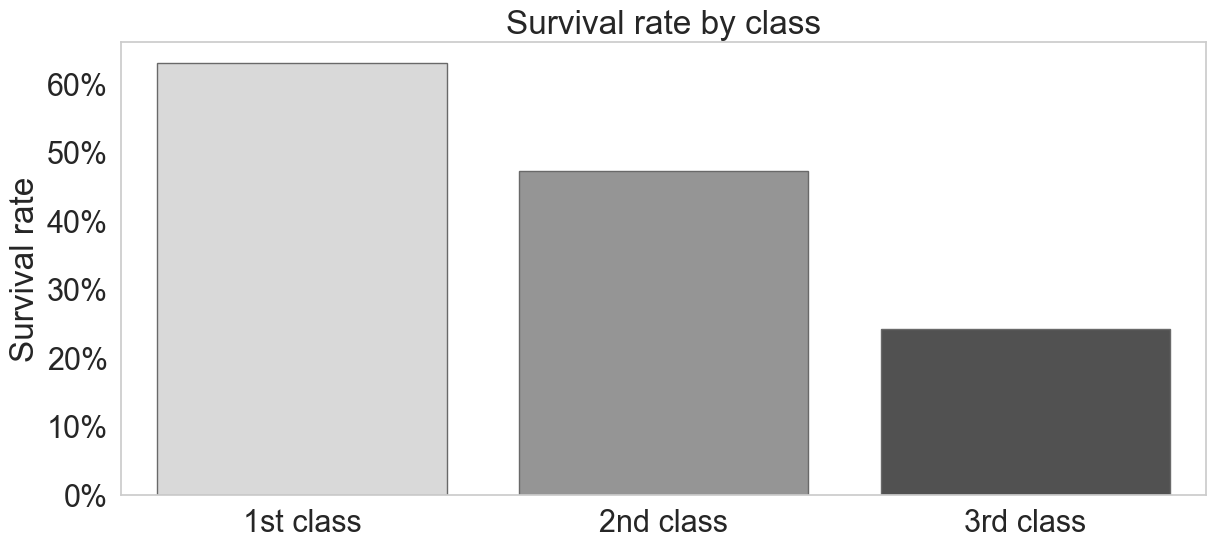

In [2]:
DRLearn.plot_passenger_class(titanic_dataset)

### Plotting survival rate by gender

Here we show how the passenger's gender affects their survival chance. Women are far more likely to survive than men.

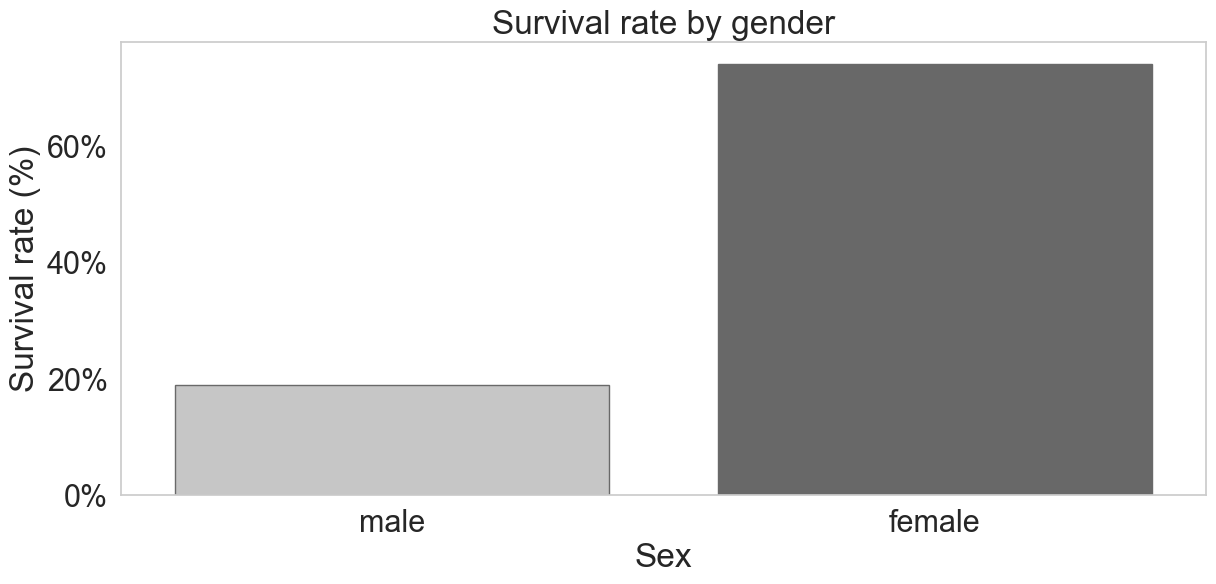

In [3]:
DRLearn.plot_passenger_gender(titanic_dataset)

## Preparing our data for the algorithm

Before we can train a machine learning model, we need to prepare our data. This means reformatting some of it to be more machine-friendly, and deleting parts that are unlikely to be helpful.

In [4]:
selected_features, target = DRLearn.extract_features(titanic_dataset)
selected_features.sample(5)

Feature extraction complete.


,Gender,Family_Size,Class_1,Class_2,Class_3
PassengerId,,,,,
410,0,5,0,0,1
408,1,3,0,1,0
75,1,1,0,0,1
636,0,1,0,1,0
468,1,1,1,0,0


Our data is now more difficult to read for humans, but easier for machines.

## Splitting our dataset into two parts: training and test

We need part of our data to train the algorithm, and part of it to evaluate how well the algorithm does. Here we split it into a training and test set.

In [5]:
X_train, X_test, y_train, y_test = DRLearn.split_dataset(selected_features, target, split=0.2)

Training set is 80% the size of the original dataset


## Training our model

The part we have been waiting for. In this step, we feed the data to the algorithm and ask it to find patterns automatically.

In [6]:
model = DRLearn.train_model(X_train, y_train)

The model has been trained!


## Evaluating the model

We need to know how much the model has learned. Here we give it the 'test' part of the dataset (which it didn't see before) and compute model accuracy.

In [7]:
DRLearn.evaluate_model(model, X_test, y_test)

Evaluating model...
The model achieved 79.89% accuracy on the test dataset


## Analysing our model


Here we find which aspects of the data the model learned were specifically interesting. We can see that gender is very important to predicting survival rate.

In [8]:
DRLearn.explain_model(model, X_train)

Weight,Feature
0.6460,Gender
0.1824,Class_3
0.1242,Family_Size
0.0383,Class_1
0.0091,Class_2


We can also analyse how it makes predictions for specific passengers.

In [9]:
model_interpretation = DRLearn.interpret_model(model, X_test, y_test)

change the number in the next line to see the anaysis for different passengers.

In [10]:
passenger_number = 3
DRLearn.analyze_passenger_prediction(model_interpretation, X_test, passenger_number)

Passenger 3 has a 93% survival chance based on the fact that she is female and not in 3rd class (`Class_3=0`). The fact that she is not in 1st class lowers her survival chances slightly (the blue section).

## Understanding how the quantity of data affects our model

Here we train our model multiple times with different amounts of data. We can see that the more data the model has, the better it does.

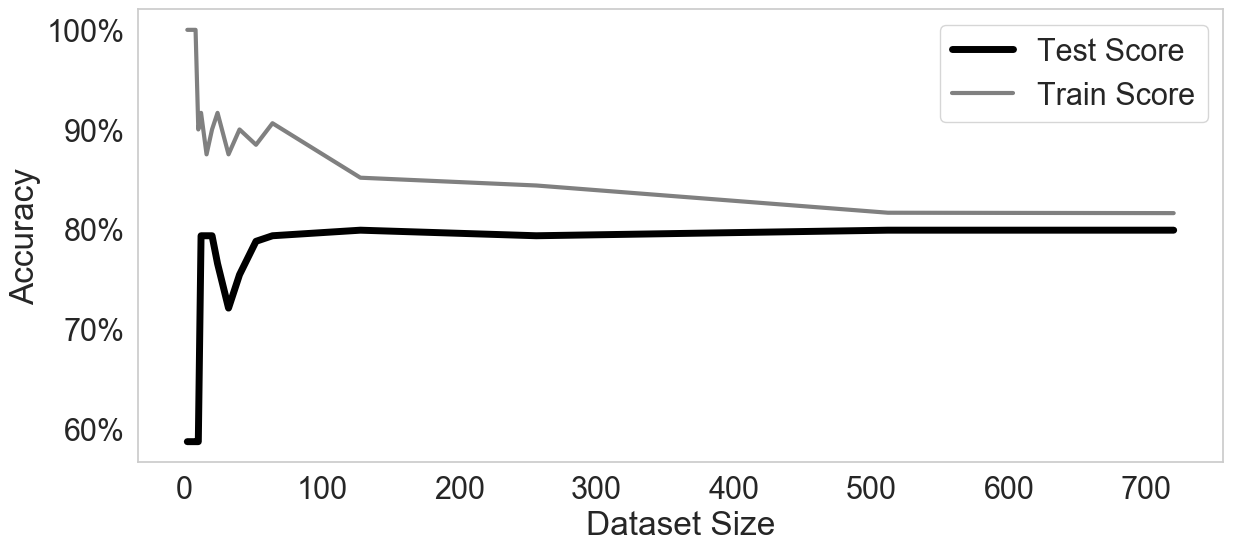

In [11]:
DRLearn.visualise_training_progress(model, X_train, y_train, X_test, y_test)

## Conclusion

You've built and trained your first machine model. Congratulations! Now you can

* Understand what data science teams do day-to-day
* Better communicate with your data science or machine learning team
* Know what kind of problems machine learning is best for
* See that machine learning is not so intimidating as a concept


The complex part of machine learning is getting into all the nitty-gritty details of building and scaling a customized solution. And that’s exactly what we specialise in, so if you need help [let us know](https://datarevenue.com).
